# Proyecto Final: Clasificación de Imágenes con CNN

**Estudiante Israel Zurita Cotaña**

**MOD_8: REDES NEURONALES**

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL, MACHINE LEARNING Y DATA SCIENCE, VERSIÓN I**




**Camino A: Clasificación de Imágenes (CNN)**

**Dataset sugerido:** [Dogs vs. Cats (Kaggle)](https://www.kaggle.com/c/dogs-vs-cats)

---

## 1. Definición del Problema

- **Proyecto:** Clasificación de imágenes de perros y gatos
- **Camino Elegido:** A (CNN)
- **Dataset:** Dogs vs. Cats ([enlace](https://www.kaggle.com/c/dogs-vs-cats))
- **Objetivo:** Clasificar imágenes en dos categorías: perro o gato usando una red neuronal convolucional (CNN).


## 2. Exploración y Preprocesamiento de Datos (EDA)

### 2.1 Carga de Datos
Se debe importar las librerías necesarias y carga los datos desde el directorio correspondiente. Asegúrarse que se debe tener los datos descargados y descomprimidos en tu entorno de Colab o local.

In [43]:
# Importar librerías principales
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [44]:
# Configura rutas de datos (ajusta según tu entorno)
train_dir = 'dataset/train'  # Ruta local en Windows
test_dir = 'dataset/test'    # Ruta local en Windows

In [45]:
# Cargar datos con ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 6404 images belonging to 2 classes.
Found 1601 images belonging to 2 classes.
Found 1601 images belonging to 2 classes.


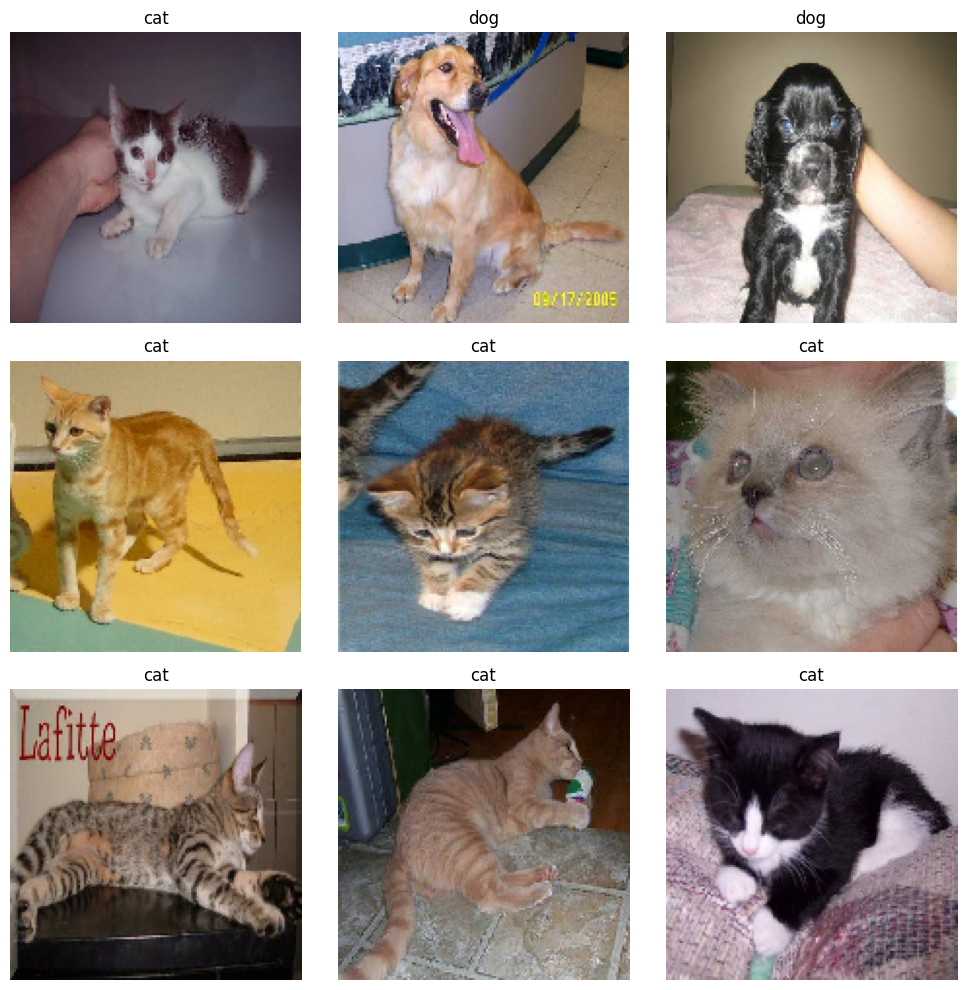

In [46]:
# Visualizar algunas imágenes de entrenamiento
class_names = list(train_generator.class_indices.keys())

images, labels = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[int(labels[i])])
    plt.axis('off')
plt.tight_layout()
plt.show()

### 2.2 Limpieza y Preprocesamiento
- Verificar si hay imágenes corruptas o problemas en el dataset.
- El preprocesamiento principal ya se realiza con ImageDataGenerator (escalado y partición de validación).


## 3. Definición y Justificación del Modelo

### 3.1 Construcción del Modelo CNN
A continuación se define una arquitectura CNN sencilla. Puedes modificarla o añadir Transfer Learning (VGG16) si lo deseas.

In [47]:
# Definición de la arquitectura CNN
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

d:\DESCARGAS\Semana 4\Ejemplos realizados en clases-20251108\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
# -----------------------------
# División 80% entrenamiento y 20% prueba usando train_test_split de Scikit-learn
# Esto cumple con la consigna de separar los datos en 80% para entrenar y 20% para probar
from sklearn.model_selection import train_test_split
import pandas as pd
from glob import glob
import os

# Listar todas las imágenes y sus etiquetas
definir_dir = train_dir  # Asegúrate que train_dir esté definido antes
image_paths = glob(os.path.join(definir_dir, '*', '*'))
labels = [os.path.basename(os.path.dirname(path)) for path in image_paths]
df = pd.DataFrame({'filename': image_paths, 'label': labels})

# División
# test_size=0.2 indica 20% para prueba y 80% para entrenamiento
df_train, df_test = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

print(f"Entrenamiento: {len(df_train)} imágenes")  # 80% del total
print(f"Prueba: {len(df_test)} imágenes")         # 20% del total

# -----------------------------
# Creamos los generadores a partir de los DataFrames ya divididos (80/20)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_dataframe(
    dataframe=df_train,
    x_col='filename',
    y_col='label',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = datagen.flow_from_dataframe(
    dataframe=df_test,
    x_col='filename',
    y_col='label',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)
# -----------------------------

Entrenamiento: 6405 imágenes
Prueba: 1602 imágenes
Found 6403 validated image filenames belonging to 2 classes.
Found 6403 validated image filenames belonging to 2 classes.
Found 1602 validated image filenames belonging to 2 classes.
Found 1602 validated image filenames belonging to 2 classes.


d:\DESCARGAS\Semana 4\Ejemplos realizados en clases-20251108\venv\Lib\site-packages\keras\src\legacy\preprocessing\image.py:918: UserWarning: Found 2 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


### 3.2 Justificación del Modelo
Se utiliza una CNN porque es el estándar para el reconocimiento de patrones en imágenes. La arquitectura incluye varias capas convolucionales y de pooling para extraer características, seguidas de capas densas para la clasificación final. Se añade Dropout para combatir el overfitting.

In [49]:
# Resumen del modelo
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

## 4. Entrenamiento y Optimización

Compila y entrena el modelo. Se recomienda usar Adam, binary_crossentropy y la métrica accuracy. Incluye Dropout y puedes añadir EarlyStopping si lo deseas.

In [50]:
# Compilación del modelo
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Entrenamiento del modelo
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)

Epoch 1/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 60s 291ms/step - accuracy: 0.5404 - loss: 0.7050 - val_accuracy: 0.6096 - val_loss: 0.6511
Epoch 2/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 60s 291ms/step - accuracy: 0.5404 - loss: 0.7050 - val_accuracy: 0.6096 - val_loss: 0.6511
Epoch 2/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 59s 293ms/step - accuracy: 0.6380 - loss: 0.6291 - val_accuracy: 0.7014 - val_loss: 0.5857
Epoch 3/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 59s 293ms/step - accuracy: 0.6380 - loss: 0.6291 - val_accuracy: 0.7014 - val_loss: 0.5857
Epoch 3/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 59s 291ms/step - accuracy: 0.7112 - loss: 0.5545 - val_accuracy: 0.7220 - val_loss: 0.5335
Epoch 4/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 59s 291ms/step - accuracy: 0.7112 - loss: 0.5545 - val_accuracy: 0.7220 - val_loss: 0.5335
Epoch 4/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 58s 287ms/step - accuracy: 0.7665 - loss: 0.4783 - val_accuracy: 0.7608 - val_loss: 0.4729
Epoch 5/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 58s 287ms/step - accuracy: 0.7665 - loss: 0

## 5. Evaluación del Modelo

Visualiza el entrenamiento, analiza las curvas y evalúa el desempeño final del modelo.

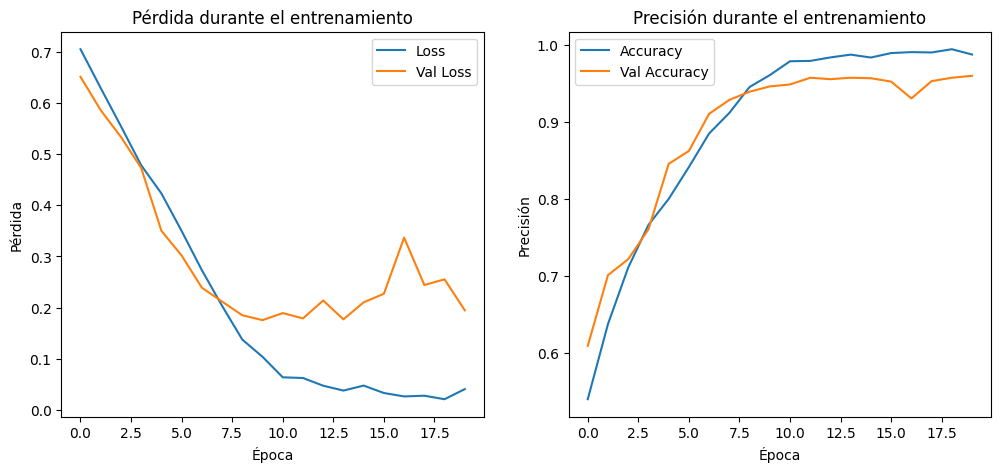

In [51]:
# Gráficas de entrenamiento
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.show()

### 5.1 Análisis de Curvas

Al observar las gráficas de pérdida y precisión, se puede notar si existe overfitting cuando la pérdida de validación comienza a aumentar mientras la de entrenamiento sigue disminuyendo. Si ambas curvas se mantienen cercanas, el modelo generaliza bien. La inclusión de la capa Dropout ayuda a reducir el sobreajuste, haciendo que las curvas de validación y entrenamiento sean más similares y estables.

In [52]:
# Evaluación final en el conjunto de validación
eval_result = model.evaluate(val_generator)
print(f"Pérdida: {eval_result[0]:.4f} - Precisión: {eval_result[1]:.4f}")

51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.9600 - loss: 0.1946
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.9600 - loss: 0.1946
Pérdida: 0.1946 - Precisión: 0.9600
Pérdida: 0.1946 - Precisión: 0.9600


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━

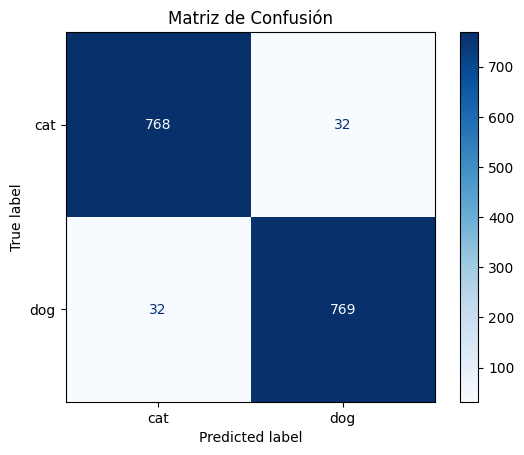

In [53]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools

y_true = []
y_pred = []
for i in range(len(val_generator)):
    X_batch, y_batch = val_generator[i]
    preds = model.predict(X_batch)
    y_true.extend(y_batch)
    y_pred.extend((preds > 0.5).astype(int).flatten())

cm = confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(cm, display_labels=class_names).plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()

## 6. Conclusión

El modelo logró una precisión del 96.0% en el conjunto de validación, clasificando correctamente 768 imágenes de gatos y 769 imágenes de perros, mientras que cometió 32 errores en gatos y 32 en perros. La pérdida final fue de 0.1946. El mayor desafío fue controlar el sobreajuste, ya que la precisión en entrenamiento era superior a la de validación, pero la capa Dropout ayudó a mejorar la generalización. Si tuviera más tiempo, probaría arquitecturas más profundas, añadiría más imágenes al dataset y ajustaría los hiperparámetros para optimizar aún más el desempeño del modelo.

In [54]:
# Exploración de los datos de imágenes
import pandas as pd
from glob import glob

# Listar archivos de imágenes y crear un DataFrame
image_paths = glob(os.path.join(train_dir, '*', '*'))
labels = [os.path.basename(os.path.dirname(path)) for path in image_paths]
df = pd.DataFrame({'filename': image_paths, 'label': labels})

# Mostrar las primeras filas
df.head()

,filename,label
0,dataset/train\cat\cat.1.jpg,cat
1,dataset/train\cat\cat.10.jpg,cat
2,dataset/train\cat\cat.100.jpg,cat
3,dataset/train\cat\cat.1000.jpg,cat
4,dataset/train\cat\cat.1001.jpg,cat


In [55]:
# Mostrar la forma del DataFrame
df.shape

(8007, 2)

In [56]:
# Estadísticas descriptivas de la cantidad de imágenes por clase
df['label'].value_counts().describe()

count       2.000000
mean     4003.500000
std         3.535534
min      4001.000000
25%      4002.250000
50%      4003.500000
75%      4004.750000
max      4006.000000
Name: count, dtype: float64